In [17]:
import pandas as pd
df = pd.read_csv('scores.csv') 

In [18]:
df.head(5)

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [20]:
df_condition = df[df.number.str.contains('condition')].copy()
df_control = df[df.number.str.contains('control')].copy()

df_condition

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [21]:
txt_missing = '_MISSING_'

In [22]:
#verileri düzenleme işlemi

df_condition.melanch = df_condition.melanch.fillna(txt_missing)
df_condition.melanch = df_condition.melanch.astype('category') 
df_condition.melanch = df_condition.melanch.cat.rename_categories({-1 : txt_missing,
                                                                   1.0 : '1',
                                                                   2.0 : '2'})
df_condition.age = df_condition.age.astype('category')
df_condition.gender = df_condition.gender.astype('category')


df_condition.afftype = df_condition.afftype.astype(int).astype('category')
df_condition.inpatient = df_condition.inpatient.astype(int).astype('category')
df_condition.marriage = df_condition.marriage.astype(int).astype('category')
df_condition.work = df_condition.work.astype(int).astype('category')


df_condition.edu = df_condition.edu.astype('category')
df_condition.edu = df_condition.edu.cat.rename_categories({' ' : txt_missing})


In [23]:
df_condition

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2,2,2,6-10,1,2,19.0,19.0
1,condition_2,18,2,40-44,1,2,2,6-10,2,2,24.0,11.0
2,condition_3,13,1,45-49,2,2,2,6-10,2,2,24.0,25.0
3,condition_4,13,2,25-29,2,2,2,11-15,1,1,20.0,16.0
4,condition_5,13,2,50-54,2,2,2,11-15,2,2,26.0,26.0
5,condition_6,7,1,35-39,2,2,2,6-10,1,2,18.0,15.0
6,condition_7,11,1,20-24,1,_MISSING_,2,11-15,2,1,24.0,25.0
7,condition_8,5,2,25-29,2,_MISSING_,2,11-15,1,2,20.0,16.0
8,condition_9,13,2,45-49,1,_MISSING_,2,6-10,1,2,26.0,26.0
9,condition_10,9,2,45-49,2,2,2,6-10,1,2,28.0,21.0


In [24]:
features_num = ['days','madrs1','madrs2']
features_cat = ['age', 'gender', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work']

In [25]:
#numerik değişkenler
df_condition[features_num].describe()

,days,madrs1,madrs2
count,23.000000,23.000000,23.000000
mean,12.652174,22.739130,20.000000
std,2.773391,4.797892,4.729021
min,5.000000,13.000000,11.000000
25%,12.500000,18.500000,16.000000
50%,13.000000,24.000000,21.000000
75%,14.000000,26.000000,24.500000
max,18.000000,29.000000,28.000000


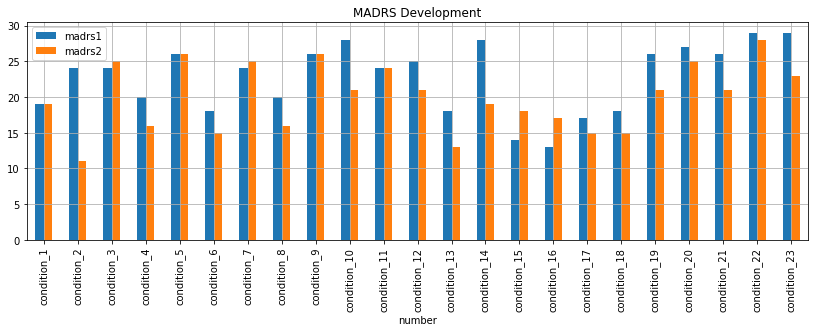

In [29]:
import matplotlib.pyplot as plt

temp_plot_paras = plt.rcParams['figure.figsize']

plt.rcParams['figure.figsize'] = (14,4)
df_condition.plot(x='number', y=['madrs1','madrs2'], kind='bar')
plt.title('MADRS Development')
plt.grid()
plt.show()

plt.rcParams['figure.figsize'] = temp_plot_paras

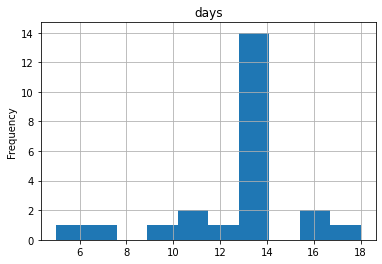

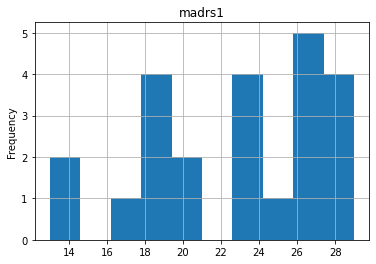

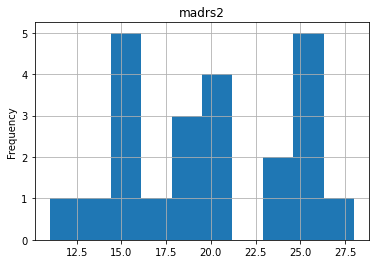

In [30]:
for f in features_num:
    df_condition[f].plot(kind='hist')
    plt.title(f)
    plt.grid()
    plt.show()

In [31]:
df_condition[features_num].corr(method='pearson')

,days,madrs1,madrs2
days,1.000000,0.122678,0.027726
madrs1,0.122678,1.000000,0.653090
madrs2,0.027726,0.653090,1.000000


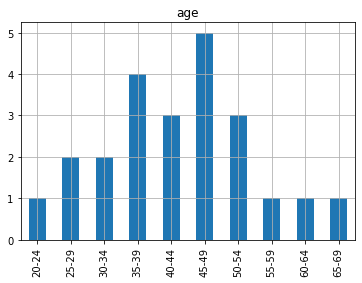

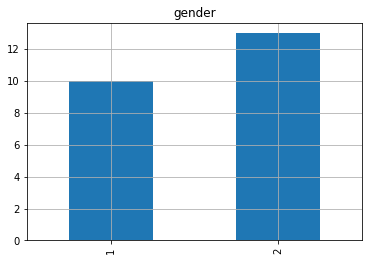

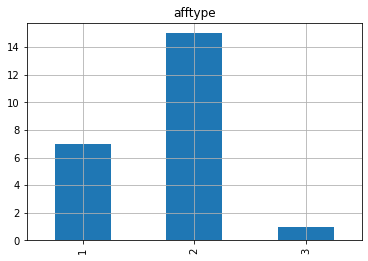

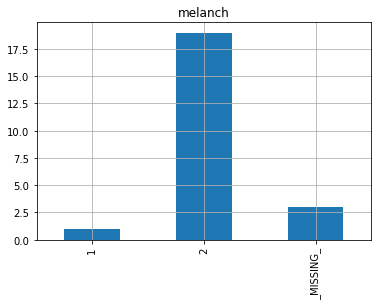

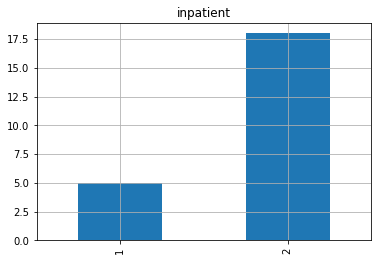

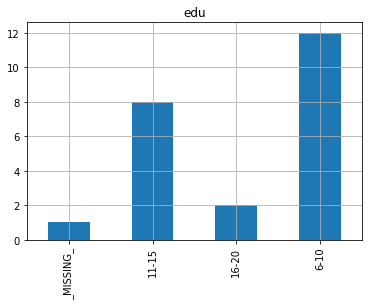

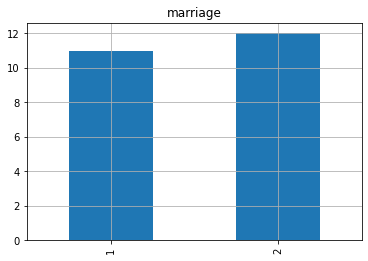

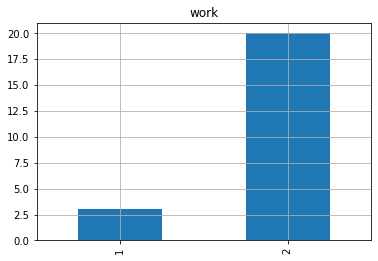

In [32]:
#kategorik değişkenler
for f in features_cat:
    df_condition[f].value_counts().sort_index().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

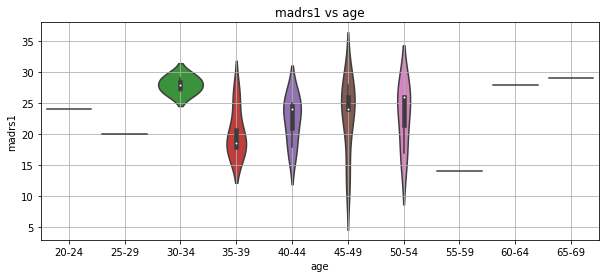

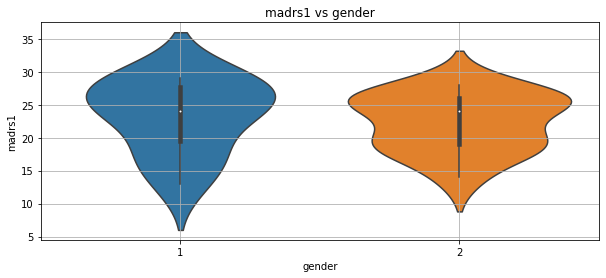

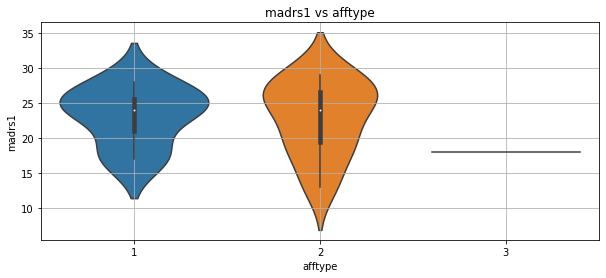

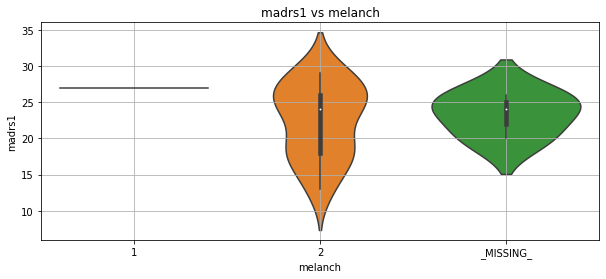

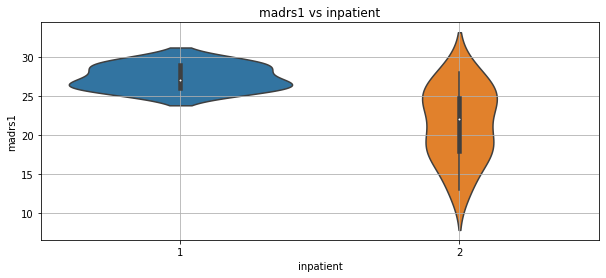

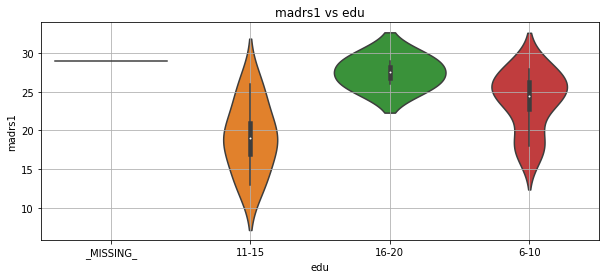

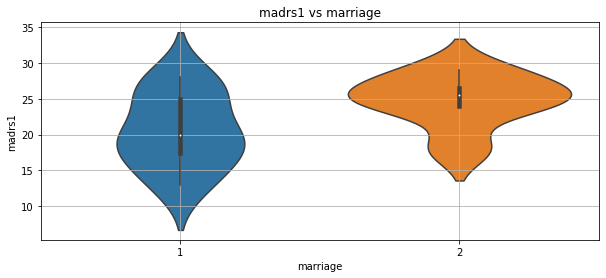

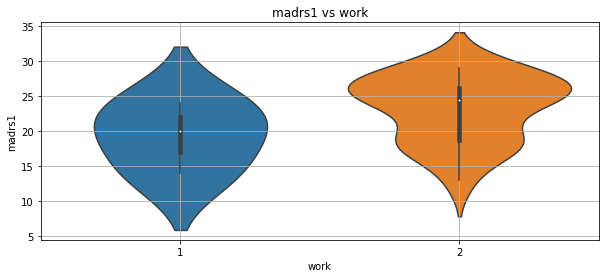

In [34]:
# madrs1'e (aktivite ölçümü başlangıcında) etkisi

import seaborn as sns

for f in features_cat:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=df_condition, x=f, y='madrs1')
    plt.title('madrs1 vs ' + f)
    plt.grid()
    plt.show()

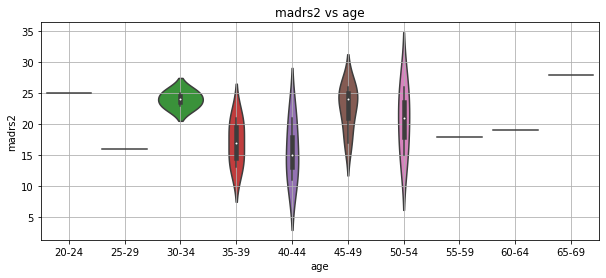

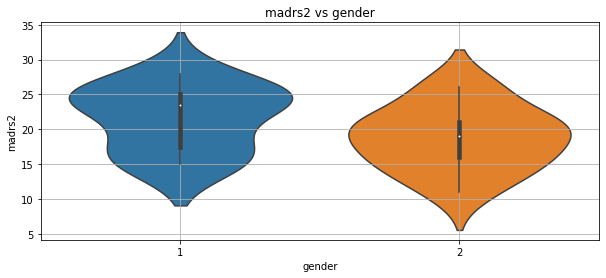

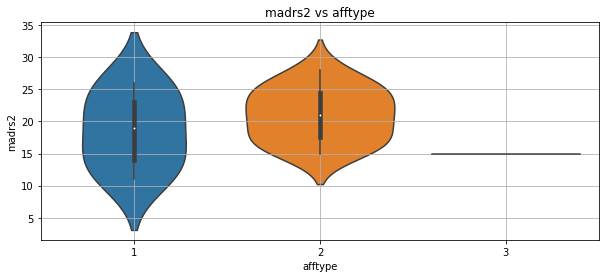

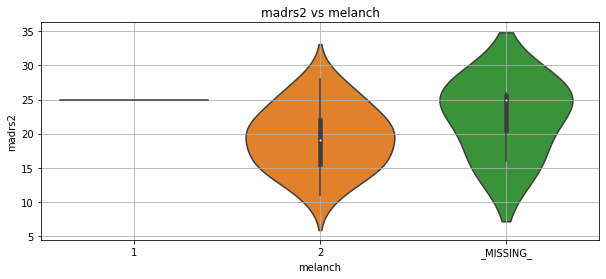

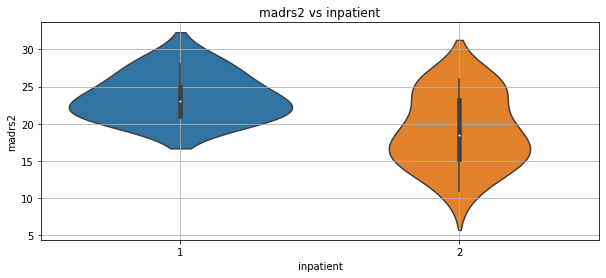

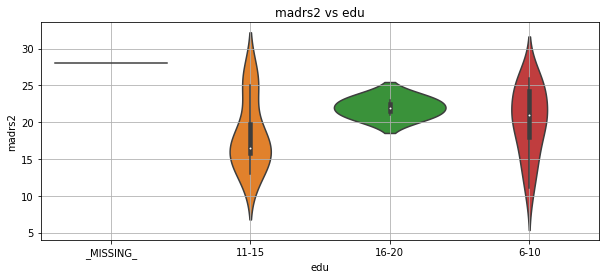

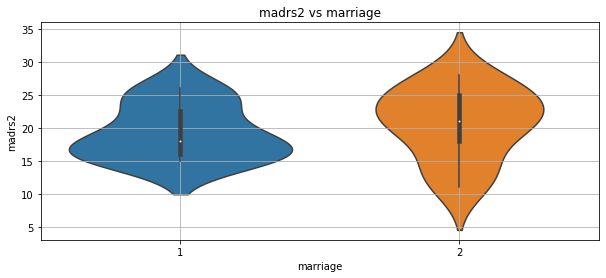

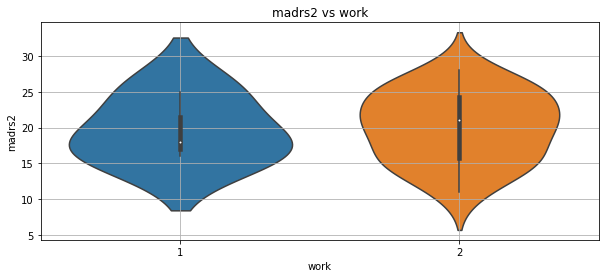

In [35]:
for f in features_cat:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=df_condition, x=f, y='madrs2')
    plt.title('madrs2 vs ' + f)
    plt.grid()
    plt.show()